In [6]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf

plt.style.use('fivethirtyeight')

In [7]:

# Pulled data from Yahoo Finance
df = yf.download('^FTSE',start = '2008-01-01', end = '2022-12-31')

print('Number of rows and columns: ', df.shape)
print(df.head())
print("checking if any null values are present\n", df.isna().sum())

[*********************100%***********************]  1 of 1 completed
Number of rows and columns:  (3788, 6)
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2008-01-02  6456.899902  6512.299805  6402.600098  6416.700195  6416.700195   
2008-01-03  6416.700195  6487.799805  6394.600098  6479.399902  6479.399902   
2008-01-04  6479.399902  6534.700195  6333.200195  6348.500000  6348.500000   
2008-01-07  6348.500000  6376.500000  6275.200195  6335.700195  6335.700195   
2008-01-08  6335.700195  6399.600098  6335.700195  6356.500000  6356.500000   

                Volume  
Date                    
2008-01-02   674073300  
2008-01-03   932411700  
2008-01-04  1182498500  
2008-01-07  1298090800  
2008-01-08  1418323100  
checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


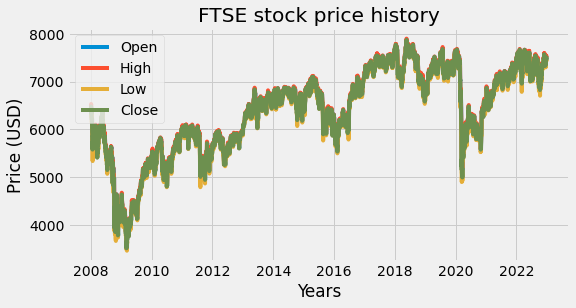

In [35]:
plt.figure(figsize = (8,4))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('FTSE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

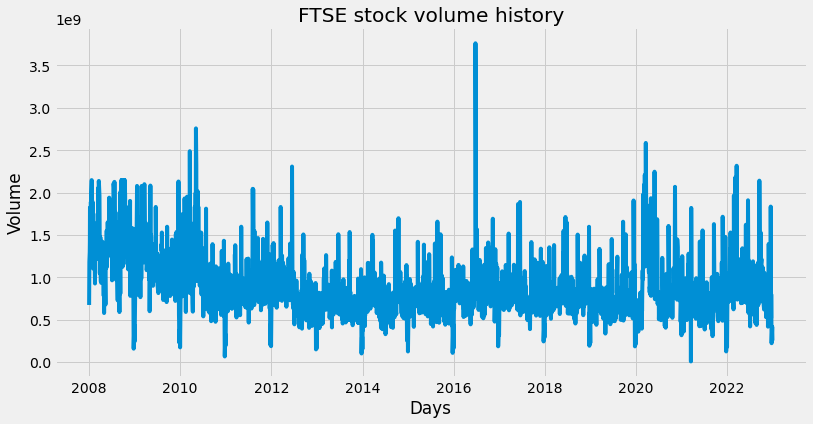

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df["Volume"])
plt.title('FTSE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [12]:
# Create a dataframe with only the Close Stock Price Column
data_target = df.filter(['Close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = data_target.values

# Splitting the dataset into training and test
# Target Variable: Close stock price value

training_data_len = math.ceil(len(target)* 0.75) # training set has 75% of the data
training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data

array([[0.66536862],
       [0.6797315 ],
       [0.64974572],
       ...,
       [0.91288317],
       [0.91643382],
       [0.9024603 ]])

In [13]:
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(854 values, 180 time-steps, 1 output)

Number of rows and columns:  (2661, 180, 1)


In [15]:
!pip install -U protobuf==3.8.0

In [16]:
# We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# 50 units which is the dimensionality of the output space
# return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# Thereafter, we add the Dense layer that specifies the output of 1 unit.
# After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
84/84 [==============================] - 24s 181ms/step - loss: 0.0295
Epoch 2/100
84/84 [==============================] - 16s 185ms/step - loss: 0.0062
Epoch 3/100
84/84 [==============================] - 16s 186ms/step - loss: 0.0053
Epoch 4/100
84/84 [==============================] - 19s 230ms/step - loss: 0.0053
Epoch 5/100
84/84 [==============================] - 21s 254ms/step - loss: 0.0047
Epoch 6/100
84/84 [==============================] - 20s 237ms/step - loss: 0.0046
Epoch 7/100
84/84 [==============================] - 20s 241ms/step - loss: 0.0045
Epoch 8/100
84/84 [==============================] - 19s 227ms/step - loss: 0.0044
Epoch 9/100
84/84 [==============================] - 22s 264ms/step - loss: 0.0040
Epoch 10/100
84/84 [==============================] - 24s 281ms/step - loss: 0.0037
Epoch 11/100
84/84 [==============================] - 20s 241ms/step - loss: 0.0042
Epoch 12/100
84/84 [==============================] - 21s 252ms/step - loss: 0.0039
E

In [17]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (947, 180, 1)


In [18]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

30/30 [==============================] - 4s 58ms/step


C:\Users\sukhi\AppData\Local\Temp/ipykernel_34456/3955688791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


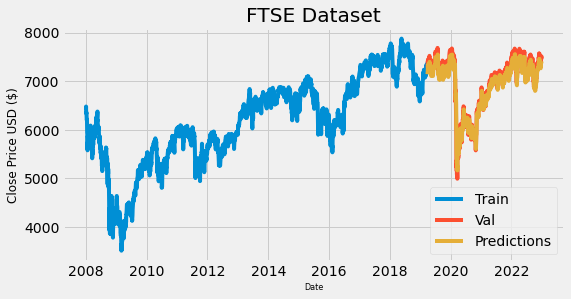

In [37]:
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(8,4))
plt.title('FTSE Dataset')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
valid.head(15)

,Close,Predictions
Date,,
2019-03-29,7279.200195,7144.817871
2019-04-01,7317.399902,7180.906738
2019-04-02,7391.100098,7216.188965
2019-04-03,7418.299805,7271.490723
2019-04-04,7401.899902,7310.345703
2019-04-05,7446.899902,7311.768066
2019-04-08,7451.899902,7334.695312
2019-04-09,7425.600098,7351.508789
2019-04-10,7421.899902,7340.841797


In [41]:
valid.tail(15)

,Close,Predictions
Date,,
2022-12-08,7472.200195,7402.344727
2022-12-09,7476.600098,7381.723633
2022-12-12,7446.000000,7379.573242
2022-12-13,7502.899902,7362.844727
2022-12-14,7495.899902,7387.910645
2022-12-15,7426.200195,7398.830078
2022-12-16,7332.100098,7357.301758
2022-12-19,7361.299805,7278.838379
2022-12-20,7370.600098,7267.444824


In [21]:
nsamples, nx, ny = X_test.shape
d2_train_dataset = X_test.reshape((nsamples,nx*ny))

In [22]:
rmse = np.sqrt(np.mean(predicted_stock_price - y_test)**2)  
rmse
     

63.359004793096624

In [23]:
import numpy as np

def mape(y_test, predicted_stock_price):
    y_test, predicted_stock_price = np.array(y_test), np.array(predicted_stock_price)
    mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))
    return mape

In [32]:
 mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))*100

In [33]:
 mape

1.310530813712516